# EDA of Housing Data 

**Summary** 

In this notebook we will explore the contents of our data. We will first understand the shape and scope of our dataset and check for any missing values. We will also ensure each feature is assigned a proper data type and check for linearity in our independent and dependent variables. 

"The factors that effect housing prices may be summarized as property **size, location desirability, nearby amenities, number of rooms, construction materials, and age and condition of the structure.**" - [Alvin T. Tan, Ph.D]('https://towardsdatascience.com/wrangling-through-dataland-modeling-house-prices-in-ames-iowa-75b9b4086c96')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
house_data = pd.read_csv('../datasets/housing_data.csv')

In [4]:
house_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


- We can see the column names are not in conventional formatting. We will convert the titles to the snake_case convention for easier access further on.  

In [5]:
house_data.columns = house_data.columns.str.lower().str.replace(' ', '_')

In [6]:
house_data.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
house_data.shape

(2051, 81)

- We have 2051 unique data points describing the retail conditions of houses in Ames Iowa. Along with this are 81 feature descriptions that can be used for our model. We will need to explore the conditions of each feature and determine which ones aren't suitable for use.  

In [8]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [9]:
house_data.isnull().sum()[lambda x: x > 0]

lot_frontage       330
alley             1911
mas_vnr_type      1240
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

**Removing Columns With a Majority of Null Values** 

Some features in our dataset have most of their rows as missing values. These features represent aspects of homes that are rarely present in Ames Iowa. Due to the landspace of Ames, most homes don't have an **alley**.   

In [10]:
half_length = int(len(house_data) / 2)
x = [i for i in house_data.columns if house_data[i].isnull().sum() > half_length]
house_data[x].isnull().sum()

alley           1911
mas_vnr_type    1240
pool_qc         2042
fence           1651
misc_feature    1986
dtype: int64

In [11]:
house_data['mas_vnr_area'].value_counts()

mas_vnr_area
0.0      1216
120.0      11
176.0      10
200.0      10
108.0       9
         ... 
142.0       1
215.0       1
235.0       1
233.0       1
426.0       1
Name: count, Length: 373, dtype: int64

In [12]:
house_data['pool_area'].value_counts()

pool_area
0      2042
519       1
576       1
800       1
228       1
480       1
648       1
738       1
368       1
561       1
Name: count, dtype: int64

In [13]:
house_data.drop(columns=x, inplace = True)

In [14]:
house_data.shape

(2051, 76)

In [17]:
# MAKE INTO VISUALS OF EACH DTYPE! 
integers = []
floats = []
objects = []
other = []
for i in house_data.columns:
    if house_data[i].dtypes == 'O':
        objects.append(i)
    elif house_data[i].dtypes == 'int64':
        integers.append(i)
    elif house_data[i].dtypes == 'float64':
        floats.append(i)
    else:
        other.append(i)

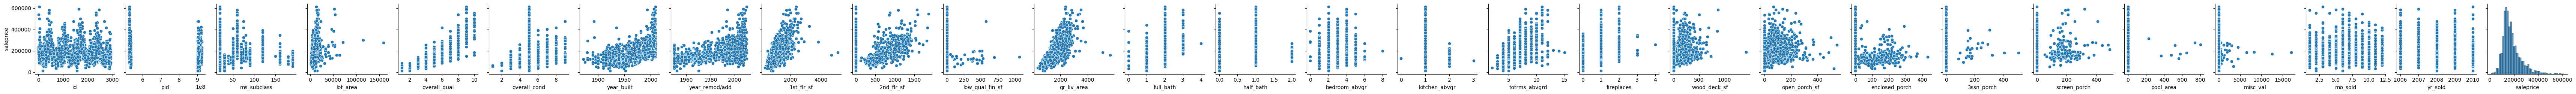

In [20]:
sns.pairplot(house_data, x_vars=integers, y_vars='saleprice')

## Analyze Dependent Variable 

- The sale price of homes are known to have heavily influencial outliers usually within the upper 75% percentile. We need to check if our dependent variable is normally ditributed or not and determine how to handle the outliers if needed.  

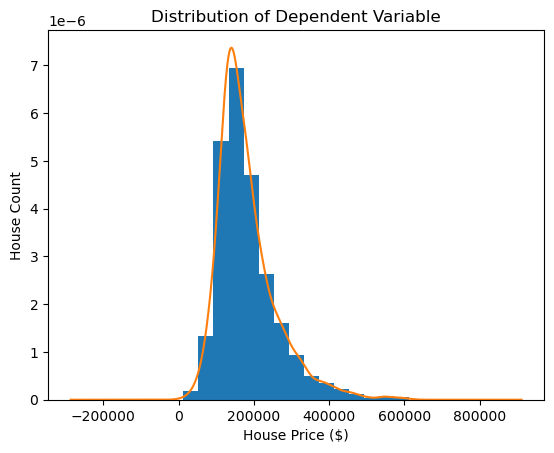

In [28]:
house_data['saleprice'].plot(kind = "hist", density = True, bins = 15) 
house_data['saleprice'].plot(kind = "kde")
plt.title('Distribution of Dependent Variable')
plt.xlabel('House Price ($)')
plt.ylabel('House Count');